## Telecom Churn Prediction

### 1. Importing libraries

In [1]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
your_local_path="G:/UpX Academy/AI Specialization/DT and RF/Sai DT RF/"

In [3]:
# Importing the train and test datasets
telco_df = pd.read_excel(your_local_path+"Telco-Customer-Churn.xlsx")

### 2. Exploring dataset

In [4]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_df.shape

(7043, 21)

In [7]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [8]:
telco_df.isna().sum()
#NO missing values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
#Descriptive Statistics
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


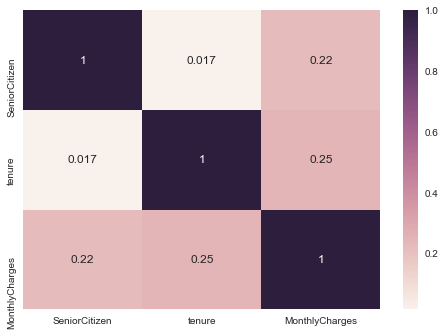

In [11]:
#let's find the correlation
corr = telco_df.corr()
sns.heatmap(corr, annot=True)
#seems like no corrleation between features.

#### Exploratory data analysis

In [12]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


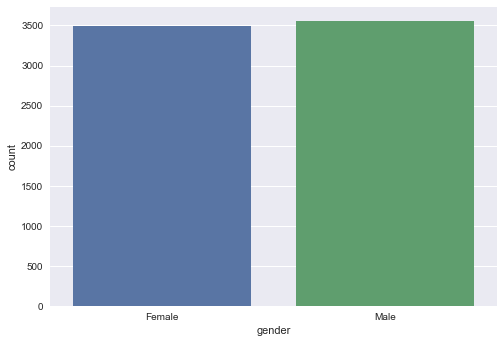

In [13]:
sns.countplot(x='gender', data=telco_df)

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


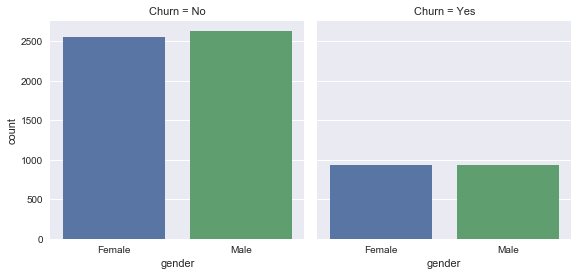

In [14]:
sns.factorplot(x='gender', col='Churn', kind='count', data=telco_df);
#NO significant relation between gender and churn

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


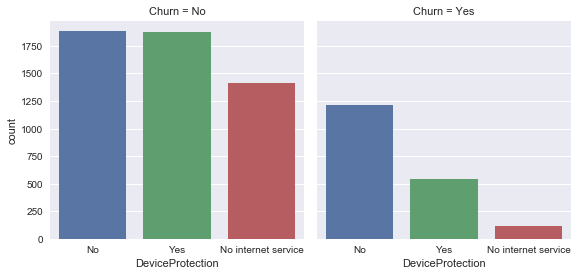

In [15]:
sns.factorplot(x='DeviceProtection', col='Churn', kind='count', data=telco_df);

In [16]:
#there have some relationship between churn and Device Protection.
#People having Device Protection less likely to churn in comparison to people not using Device Protection.

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


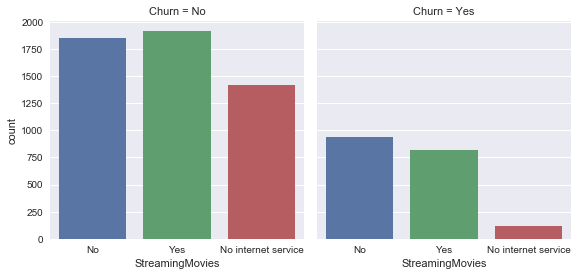

In [17]:
sns.factorplot(x='StreamingMovies', col='Churn', kind='count', data=telco_df);

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


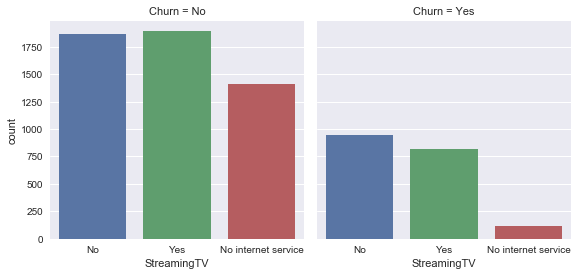

In [18]:
sns.factorplot(x='StreamingTV', col='Churn', kind='count', data=telco_df);

C:\Users\prashant bajetha\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


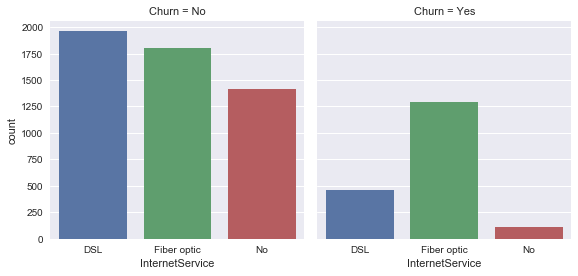

In [19]:
sns.factorplot(x='InternetService', col='Churn', kind='count', data=telco_df);

In [20]:
# People using fibre optic are most likely to churn.

## Feature Engineering

In [21]:
telco_df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [23]:
#lets separate out categorical and continuous variable.
cat_columns = telco_df.dtypes.loc[telco_df.dtypes =='object'].index
cat_columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [25]:
cat_df = telco_df[['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]
cat_df.shape

(7043, 16)

In [26]:
#get dummies for these categorical columns
cat_cols = pd.get_dummies(cat_df, drop_first=True)
cat_cols.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [27]:
cat_cols.shape

(7043, 27)

In [28]:
num_df = telco_df.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'], axis=1)
num_df.shape

(7043, 5)

In [29]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID        7043 non-null object
SeniorCitizen     7043 non-null int64
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
TotalCharges      7043 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 275.2+ KB


In [30]:
#Merging dummified columns and numerical columns
dataset = pd.concat([num_df,cat_cols], axis=1 )
dataset.shape

(7043, 32)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 32 columns):
customerID                               7043 non-null object
SeniorCitizen                            7043 non-null int64
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
TotalCharges                             7043 non-null object
gender_Male                              7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                 

In [32]:
#here the column TotalCharges is object type but the entries to it are integer type.
#lets deal with it
#looking for blanks in column
dataset['TotalCharges'][dataset['TotalCharges']==' ']

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [33]:
#only 11 entries are blank, removing them will not affect the dataset and changing its type to numeric.
dataset = dataset.drop(labels = list(dataset.TotalCharges[dataset.TotalCharges == " "].index))
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

## Model Building

### 1. Decision Trees

In [34]:
y = dataset["Churn_Yes"].values

X = dataset.drop(['Churn_Yes','customerID'], axis=1)

In [35]:
# Stratified sampling
#Stratify sampling means as the dataset is imbalanced dataset(number of samples belonging to each class are not same).
# In order to have same proportion in both train and test as that of dataset, so that training can be done on both
#classes.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7,stratify=y)

In [36]:
# Importing the packages for Decision Tree Classifier

from sklearn import tree
my_tree_one = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=7, min_samples_leaf=3, class_weight="balanced")  #, class_weight="balanced"
my_tree_one

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

#### 1.1 Training Decision Tree

In [37]:
# Fit the decision tree model on your features and label

my_tree_one = my_tree_one.fit(X_train, y_train)

In [38]:
# The feature_importances_ attribute make it simple to interpret the significance of the predictors you include

list(zip(X_train.columns,my_tree_one.feature_importances_))

[('SeniorCitizen', 0.0),
 ('tenure', 0.0),
 ('MonthlyCharges', 0.03472415067555044),
 ('TotalCharges', 0.013768201379750393),
 ('gender_Male', 0.0),
 ('Partner_Yes', 0.0),
 ('Dependents_Yes', 0.0),
 ('PhoneService_Yes', 0.0),
 ('MultipleLines_No phone service', 0.0),
 ('MultipleLines_Yes', 0.0),
 ('InternetService_Fiber optic', 0.1289150583162793),
 ('InternetService_No', 0.0),
 ('OnlineSecurity_No internet service', 0.0),
 ('OnlineSecurity_Yes', 0.0),
 ('OnlineBackup_No internet service', 0.0),
 ('OnlineBackup_Yes', 0.0),
 ('DeviceProtection_No internet service', 0.0),
 ('DeviceProtection_Yes', 0.0),
 ('TechSupport_No internet service', 0.0),
 ('TechSupport_Yes', 0.0),
 ('StreamingTV_No internet service', 0.0),
 ('StreamingTV_Yes', 0.0),
 ('StreamingMovies_No internet service', 0.0),
 ('StreamingMovies_Yes', 0.0441071167126132),
 ('Contract_One year', 0.2832011650722601),
 ('Contract_Two year', 0.4849923629520691),
 ('PaperlessBilling_Yes', 0.0),
 ('PaymentMethod_Credit card (automati

In [39]:
# The accuracy of the model on Train data

print(my_tree_one.score(X_train, y_train))

0.6542135427722352


In [45]:
# Visualize the decision tree graph

with open('tree.dot','w') as dotfile:
    tree.export_graphviz(my_tree_one, out_file=dotfile, feature_names=X_train.columns, filled=True)
    dotfile.close()
    
# You may have to install graphviz package using 
# conda install graphviz
# conda install python-graphviz

from graphviz import Source

with open('tree.dot','r') as f:
    text=f.read()
    plot=Source(text)
plot   

ModuleNotFoundError: No module named 'graphviz'

In [47]:
#Grid search
from sklearn.model_selection import GridSearchCV
param_test = {
 'max_depth':[5,10,15],
 'criterion':['gini','entropy']
}

# Building the model

my_tree_three = tree.DecisionTreeClassifier(class_weight="balanced")

# Cross-validation tells how well a model performs on a dataset using multiple samples of train data
grid = GridSearchCV(estimator = my_tree_three, cv=3, 
                    param_grid = param_test,verbose = 2)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] criterion=gini, max_depth=5 .....................................
[CV] ...................... criterion=gini, max_depth=5, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ...................... criterion=gini, max_depth=5, total=   0.0s
[CV] criterion=gini, max_depth=5 .....................................
[CV] ...................... criterion=gini, max_depth=5, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ..................... criterion=gini, max_depth=10, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................
[CV] ..................... criterion=gini, max_depth=10, total=   0.0s
[CV] criterion=gini, max_depth=10 ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... criterion=gini, max_depth=10, total=   0.0s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ..................... criterion=gini, max_depth=15, total=   0.0s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ..................... criterion=gini, max_depth=15, total=   0.0s
[CV] criterion=gini, max_depth=15 ....................................
[CV] ..................... criterion=gini, max_depth=15, total=   0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ................... criterion=entropy, max_depth=5, total=   0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ................... criterion=entropy, max_depth=5, total=   0.0s
[CV] criterion=entropy, max_depth=5 ..................................
[CV] ................... criterion=entropy, max_depth=5, total=   0.0s
[CV] criterion=entropy, max_depth=10 .................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [48]:
#best accuracy score
grid.best_score_

0.7386966673742306

In [49]:
#best parameter
grid.best_params_

{'criterion': 'entropy', 'max_depth': 5}

In [50]:
# Building the model based on new parameters

my_tree_three = tree.DecisionTreeClassifier(max_depth= 5, random_state=42,min_samples_split = 3, class_weight="balanced")
my_tree_three.fit(X_train,y_train)

# Accuracy Score for new model(this is training accuracy)

my_tree_three.score(X_train,y_train)

0.736998514115899

In [59]:
from sklearn.metrics import confusion_matrix, classification_report
pred = my_tree_three.predict(X_test)
df_confusion = confusion_matrix(y_test, pred)
df_confusion

#total misclassification
# (124+522)

array([[1182,  522],
       [ 124,  493]], dtype=int64)

### 1.2 Random Forest Classifier

In [51]:
# Building and fitting Random Forest

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion = 'gini',  n_estimators = 100, max_depth = 10, random_state = 101, class_weight="balanced")

In [52]:
# Fitting the model on Train Data

my_forest = forest.fit(X_train, y_train)

In [53]:
# Print the accuracy score of the fitted random forest

print(my_forest.score(X_train, y_train))

0.8609637019741032


In [60]:
# Making predictions

pred = my_forest.predict(X_test)

In [55]:
list(zip(X_train.columns,my_forest.feature_importances_))

[('SeniorCitizen', 0.010828302158828875),
 ('tenure', 0.16947899359480775),
 ('MonthlyCharges', 0.10900299984715885),
 ('TotalCharges', 0.14964547944726872),
 ('gender_Male', 0.015282444002970881),
 ('Partner_Yes', 0.01493750179247957),
 ('Dependents_Yes', 0.014734973330560383),
 ('PhoneService_Yes', 0.003929180164821828),
 ('MultipleLines_No phone service', 0.004459938462258459),
 ('MultipleLines_Yes', 0.011801042023981636),
 ('InternetService_Fiber optic', 0.05565435775102847),
 ('InternetService_No', 0.014135705008372836),
 ('OnlineSecurity_No internet service', 0.010758295257154675),
 ('OnlineSecurity_Yes', 0.035642561999001704),
 ('OnlineBackup_No internet service', 0.006859305769129517),
 ('OnlineBackup_Yes', 0.015476043989314292),
 ('DeviceProtection_No internet service', 0.016363684772281034),
 ('DeviceProtection_Yes', 0.012945554710324077),
 ('TechSupport_No internet service', 0.014841761330107261),
 ('TechSupport_Yes', 0.03391747662459865),
 ('StreamingTV_No internet service'

In [61]:
#evauation of random forest on test set
df_confusion_rf = confusion_matrix(y_test, pred)
df_confusion_rf

#total misclassification
#(174+331)

array([[1373,  331],
       [ 174,  443]], dtype=int64)